<a href="https://colab.research.google.com/github/vinits7/ML-Projects/blob/main/Exploratory_Data_Analysis_Terrorism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vinit Shah

Data Science Intern at Let's Grow More LGMVIP Mar 23

Exploratory Data Analysis - Terrorism

Import Libraries

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Importing Dataset

In [2]:
df = pd.read_csv("/content/globalterrorismdb_0718dist.csv",encoding='latin1')

In [3]:
df.head()


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


Exploring Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5096 entries, 0 to 5095
Columns: 135 entries, eventid to related
dtypes: float64(64), int64(17), object(54)
memory usage: 5.2+ MB


In [5]:
df.shape  #Check shape of data

(5096, 135)

In [6]:
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [7]:
#Rename columns
df.rename(columns={'iyear':'Year', 'imonth':'Month', 'iday':'Day','country_txt':'Country', 'region_txt': 'Region', 'provstate': 'State', 'city': 'City', 'attacktype1_txt': 'Attacktype', 'targtype1_txt': 'Targettype', 'gname': 'Group', 'weaptype1_txt':'Weapon', 'nkill':'Kill', 'nwound':'Wound' }, inplace = True)

In [8]:
#Select Useful columns
data = df[['Year', 'Month','Day','Country','State','Region','City','latitude','longitude','Attacktype','Kill','Wound','target1',
          'summary','Group', 'Targettype', 'Weapon', 'motive']]

In [9]:
# check top 5 data
data.head()

,Year,Month,Day,Country,State,Region,City,latitude,longitude,Attacktype,Kill,Wound,target1,summary,Group,Targettype,Weapon,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [10]:
# check shape of new data
data.shape

(5096, 18)

In [11]:
# Check details of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5096 entries, 0 to 5095
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        5096 non-null   int64  
 1   Month       5096 non-null   int64  
 2   Day         5096 non-null   int64  
 3   Country     5096 non-null   object 
 4   State       5083 non-null   object 
 5   Region      5096 non-null   object 
 6   City        5096 non-null   object 
 7   latitude    5006 non-null   float64
 8   longitude   5006 non-null   float64
 9   Attacktype  5096 non-null   object 
 10  Kill        4484 non-null   float64
 11  Wound       3308 non-null   float64
 12  target1     5039 non-null   object 
 13  summary     798 non-null    object 
 14  Group       5095 non-null   object 
 15  Targettype  5095 non-null   object 
 16  Weapon      5095 non-null   object 
 17  motive      536 non-null    object 
dtypes: float64(4), int64(3), object(11)
memory usage: 716.8+ KB


In [12]:
# check null values
data.isnull().sum()

Year             0
Month            0
Day              0
Country          0
State           13
Region           0
City             0
latitude        90
longitude       90
Attacktype       0
Kill           612
Wound         1788
target1         57
summary       4298
Group            1
Targettype       1
Weapon           1
motive        4560
dtype: int64

In [13]:
# replace null values
data['Wound'] = data['Wound'].fillna(0)
data['Kill'] = data['Kill'].fillna(0)

In [14]:
# Statistical data
data.describe()

,Year,Month,Day,latitude,longitude,Kill,Wound
count,5096.000000,5096.000000,5096.000000,5006.000000,5006.000000,5096.000000,5096.000000
mean,1973.809066,6.158359,15.303375,36.559454,-26.458558,0.647567,0.719192
std,2.337862,3.293888,9.140459,22.836022,51.475161,3.033054,7.164589
min,1970.000000,0.000000,0.000000,-43.532054,-157.818968,0.000000,0.000000
25%,1972.000000,3.000000,7.000000,35.800916,-73.931351,0.000000,0.000000
50%,1974.000000,6.000000,15.000000,41.400635,-5.956210,0.000000,0.000000
75%,1976.000000,9.000000,23.000000,52.501530,7.519113,1.000000,0.000000
max,1977.000000,12.000000,31.000000,59.332788,172.636225,92.000000,285.000000


In [15]:
# check unique values
data.nunique()

Year             8
Month           13
Day             32
Country         93
State          361
Region          11
City          1009
latitude      1067
longitude     1069
Attacktype      10
Kill            32
Wound           51
target1       4270
summary        763
Group          343
Targettype      22
Weapon          11
motive         237
dtype: int64

Exploratory data analysis

Data Visualization

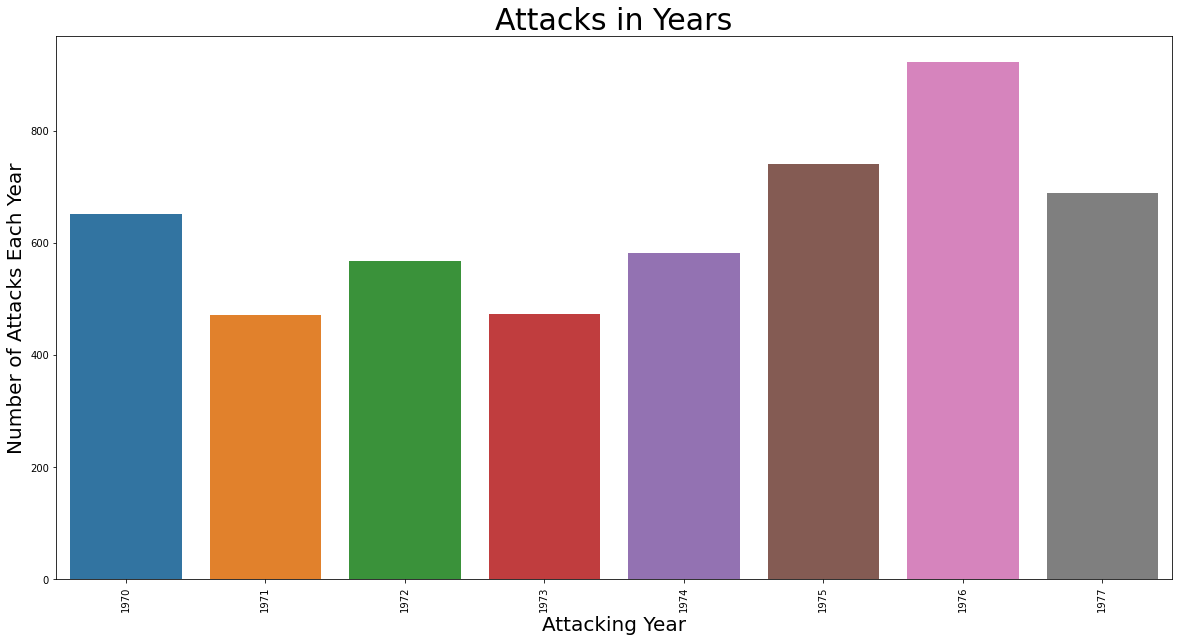

In [16]:
# Attacks in year
year = data['Year'].unique()
years_count = data['Year'].value_counts(dropna = False).sort_index()

plt.figure(figsize= (20, 10))
sns.barplot(x= year, y = years_count, palette= "tab10")

plt.xticks(rotation = 90)
plt.xlabel('Attacking Year', fontsize = 20)
plt.ylabel('Number of Attacks Each Year', fontsize = 20)
plt.title('Attacks in Years', fontsize = 30)
plt.show()

Above Graph shows 2012-2017 attack is more than other year. In year 2014 is very high attacks.

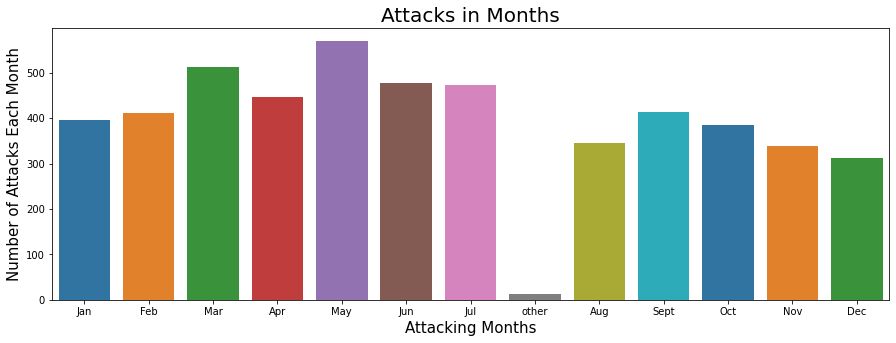

In [17]:
# Attacks in Months
Month = data['Month'].unique()
Months_count = data['Month'].value_counts(dropna = False).sort_index()
positions = (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)
labels= ("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "other", "Aug", "Sept", "Oct", "Nov", "Dec" )

plt.figure(figsize= (15, 5))
sns.barplot(x= Month, y = Months_count, palette= "tab10")

plt.xticks(positions, labels, fontsize=10, rotation = 0)

plt.xlabel('Attacking Months', fontsize = 15)
plt.ylabel('Number of Attacks Each Month', fontsize = 15)
plt.title('Attacks in Months', fontsize = 20)
plt.show()

Above Bar plot shows most of the attacks in the Month of May.

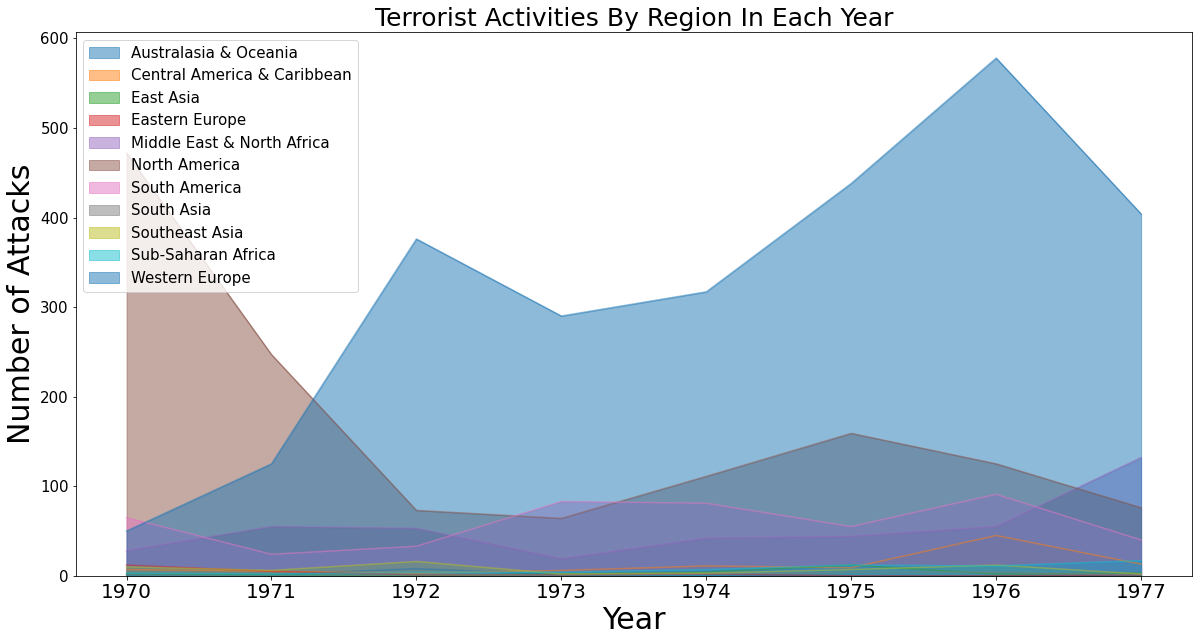

In [18]:
# Terrorist activities By Region every year
pd.crosstab(data.Year, data.Region).plot(kind='area',stacked=False,figsize=(20,10))

plt.xticks(fontsize=20)
plt.yticks(fontsize=15)

plt.title('Terrorist Activities By Region In Each Year',fontsize=25)
plt.ylabel('Number of Attacks',fontsize=30)
plt.xlabel("Year",fontsize=30)
plt.legend(loc='upper left', fontsize=15)
plt.show()

From above graph shows the Middle East & North Africa Region has more attacks.

In [19]:
attack = data.Country.value_counts()[:10]
attack

United States         1259
United Kingdom        1245
Italy                  368
Spain                  345
Argentina              279
West Germany (FRG)     225
Turkey                 222
France                 178
Greece                  82
Iran                    67
Name: Country, dtype: int64

In [20]:
data.Group.value_counts()[1:10]

Irish Republican Army (IRA)            669
Protestant extremists                  184
Left-Wing Militants                    169
Ulster Volunteer Force (UVF)           159
Black September                        120
Basque Fatherland and Freedom (ETA)    103
Ulster Freedom Fighters (UFF)           90
Montoneros (Argentina)                  88
Black Nationalists                      82
Name: Group, dtype: int64

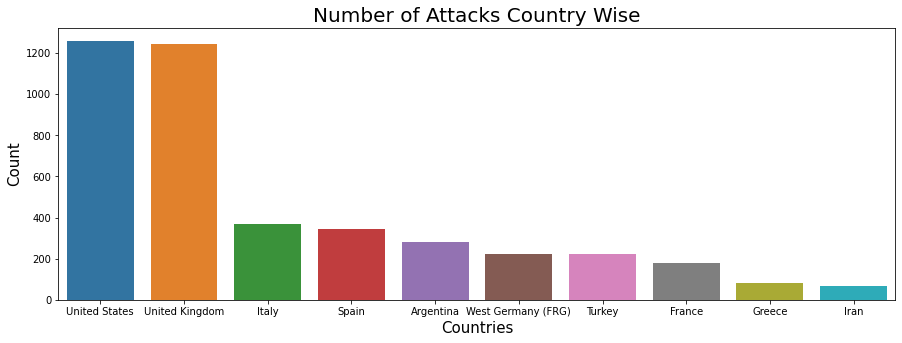

In [21]:
#Finding Number of Attack country wise
plt.figure(figsize= (15,5))

sns.barplot(attack.index,attack)
plt.title('Number of Attacks Country Wise', fontsize = 20)
plt.xlabel('Countries', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

From above Data and Plot shows Country Iraq has more Attacks.

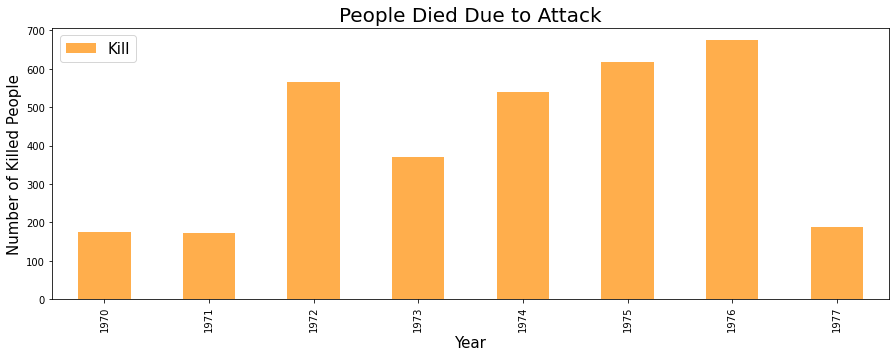

In [22]:
# Finding people died due to attack every year
df = data[['Year', 'Kill']].groupby(['Year']).sum()

#plot
df.plot(kind= 'bar',alpha=0.7,color='DarkOrange', figsize= (15,5))
plt.title('People Died Due to Attack', fontsize = 20)
plt.xlabel('Year', fontsize= 15)
plt.ylabel('Number of Killed People', fontsize = 15)
plt.legend(loc='upper left', fontsize=15)
plt.show()

In Year 2014 higher number of people is Died.

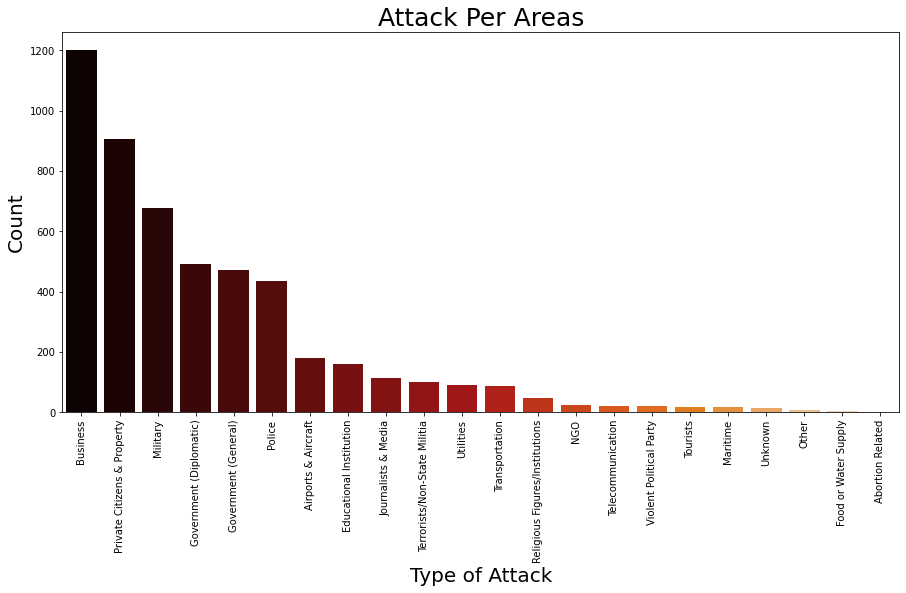

In [23]:
#Finding Attack Different type of Areas
plt.figure(figsize=(15, 7))
sns.countplot(data.Targettype, order= data.Targettype.value_counts().index, palette="gist_heat")

plt.xticks(rotation= 90)
plt.xlabel('Type of Attack', fontsize= 20)
plt.ylabel('Count', fontsize= 20)
plt.title('Attack Per Areas', fontsize= 25)

plt.show()

Above plot shows Attacks on Privet Citizens & Property is high.

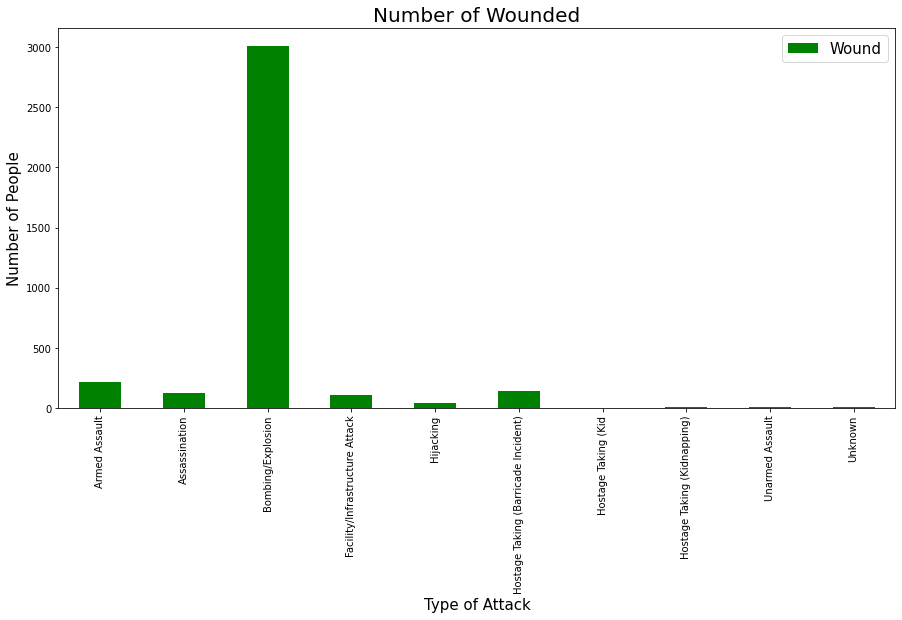

In [24]:
#Finding Number of people Wounded
data[["Attacktype","Wound"]].groupby(["Attacktype"], axis=0).sum().plot(kind='bar', figsize=(15,7), color=['green'])

plt.xlabel('Type of Attack', fontsize= 15)
plt.ylabel('Number of People', fontsize= 15)
plt.title('Number of Wounded', fontsize= 20)
plt.legend( fontsize=15)

plt.show()

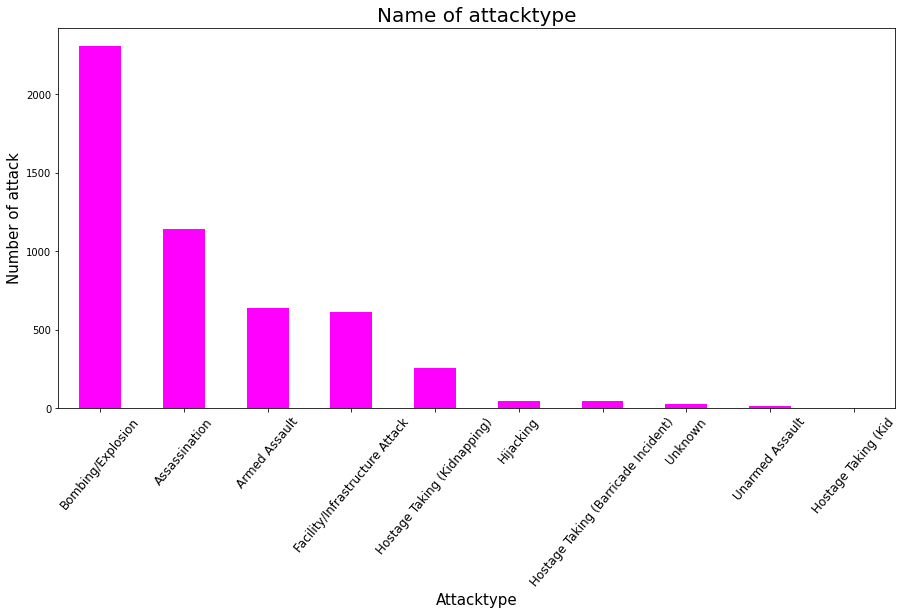

In [25]:
data['Attacktype'].value_counts().plot(kind='bar',figsize=(15,7),color='magenta')
plt.xticks(rotation = 50, fontsize =12)
plt.xlabel("Attacktype",fontsize=15)
plt.ylabel("Number of attack",fontsize=15)
plt.title("Name of attacktype",fontsize=20)
plt.show()

From above plot we can see the Most attack types is Bombing/Explosion

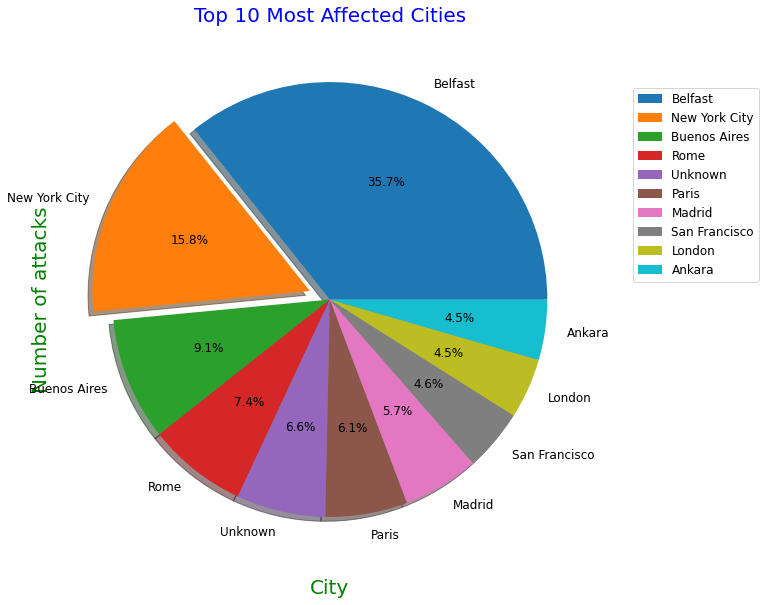

In [26]:
#Check Top city affected By Pie chart

explode = (0, 0.1, 0, 0, 0, 0, 0, 0, 0, 0)
data['City'].value_counts().to_frame().sort_values('City', axis=0, ascending= False).head(10).plot(kind= 'pie',
                                                subplots=True, explode = explode,figsize=(10,10), shadow=True, 
                                                textprops={'fontsize':12,'weight':'light','color':'k'},
                                                autopct='%1.1f%%')

plt.xticks(rotation = 50)
plt.xlabel('City', fontsize=20, c='g')
plt.ylabel('Number of attacks', fontsize= 20, c= 'g')
plt.title('Top 10 Most Affected Cities', fontsize= 20, color= 'b')
plt.legend(loc='upper right', bbox_to_anchor =(1.3,0.9), fontsize=12)  #location of legend
plt.show()

Baghdad is most affected City from Terror attacks.

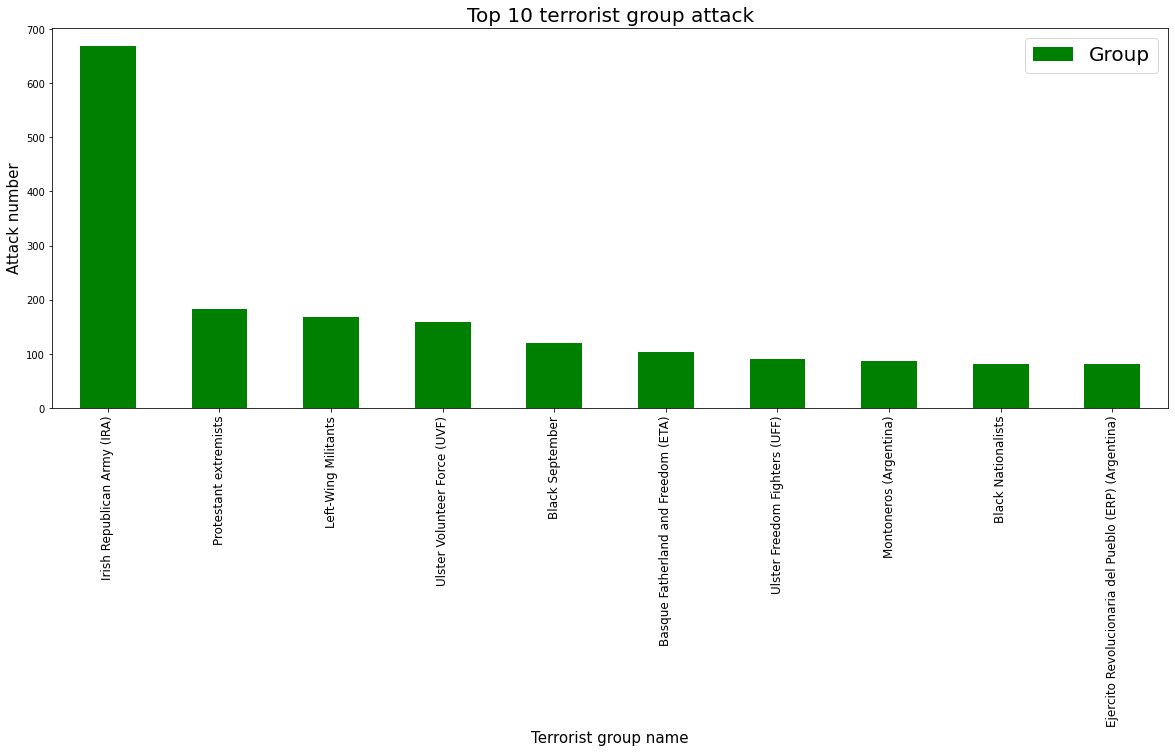

In [27]:
#Top 10 Terrorist Group as per attack Count
data['Group'].value_counts().to_frame().drop('Unknown').head(10).plot(kind='bar',color='green',figsize=(20,7))

plt.title("Top 10 terrorist group attack",fontsize=20)
plt.xlabel("Terrorist group name",fontsize=15)
plt.ylabel("Attack number",fontsize=15)
plt.xticks(fontsize= 12)
plt.legend(fontsize =20)
plt.show()

Taliban Terrorist group has highest number of attacks.

In [28]:
# Top 10 Terrorist groups as per Kills
df= data[['Group', 'Country','Kill']]
df=df.groupby(["Group","Country"], axis= 0).sum().sort_values('Kill', ascending= False).drop('Unknown').reset_index().head(10)
data['Group'].value_counts().to_frame().drop('Unknown').head(10)
df

,Group,Country,Kill
0,Irish Republican Army (IRA),United Kingdom,804.0
1,Ulster Volunteer Force (UVF),United Kingdom,231.0
2,Protestant extremists,United Kingdom,214.0
3,Montoneros (Argentina),Argentina,187.0
4,Ulster Freedom Fighters (UFF),United Kingdom,100.0
5,"Popular Front for the Liberation of Palestine,...",Greece,88.0
6,Irish Republican Extremists,United Kingdom,75.0
7,Coordination of the United Revolutionary Organ...,Barbados,73.0
8,23rd of September Communist League,Mexico,63.0
9,Basque Fatherland and Freedom (ETA),Spain,52.0


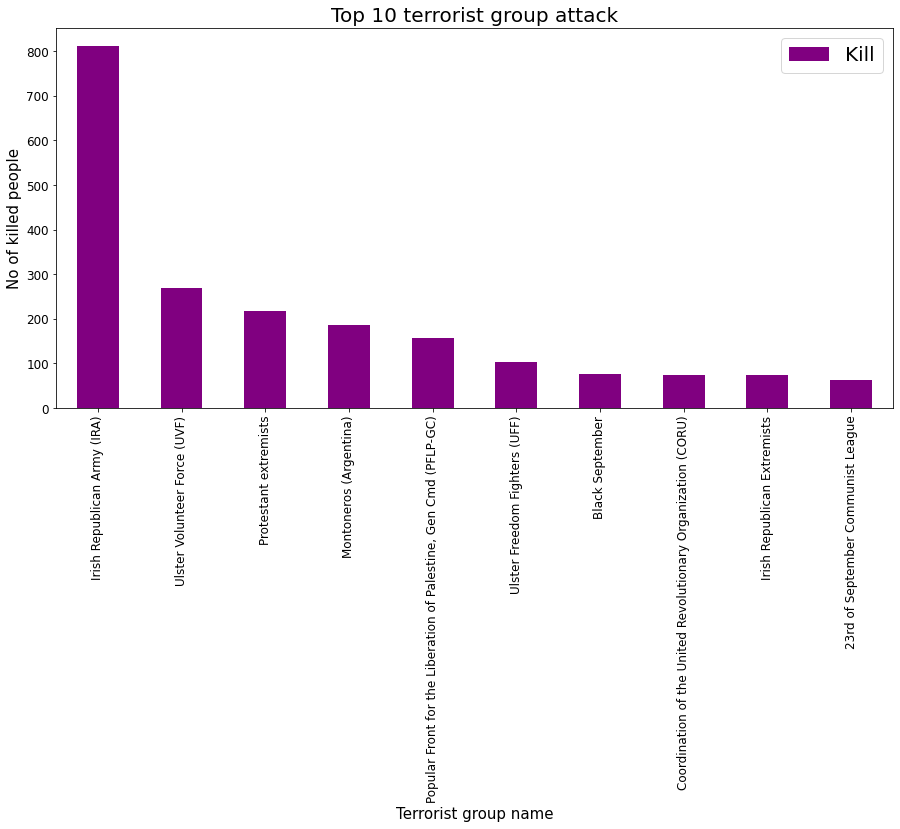

In [29]:
# Top 10 terrorist group attacks by kills
data[['Group','Kill']].groupby(['Group'],axis=0).sum().drop('Unknown').sort_values('Kill',
                                ascending=False).head(10).plot(kind='bar',color='Purple',figsize=(15,7))


plt.title("Top 10 terrorist group attack",fontsize=20)
plt.xlabel("Terrorist group name",fontsize=15)
plt.ylabel("No of killed people",fontsize=15)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)

plt.legend(fontsize =20)

plt.show()

From above Data and plot shows the Top 1 Terrorist Group by Number of kills is Islamic State of Iraq and the Levant (ISIL) and 2nd is Taliban.

In [30]:
#Number of peoples lost there lives
kill= data.loc[:,'Kill']
print('Number of People Killed by terror attack: ', int(sum(kill.dropna())))


Number of People Killed by terror attack:  3300


In [31]:
# Number of kill as per Attack type
typekill = data.pivot_table(columns="Attacktype", values ='Kill', aggfunc='sum')
typekill

Attacktype,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kid,Hostage Taking (Kidnapping),Unarmed Assault,Unknown
Kill,649.0,1140.0,1197.0,18.0,71.0,125.0,0.0,71.0,1.0,28.0


In [32]:
# Number of kill country wise
countrykill = data.pivot_table(columns="Country", values ='Kill', aggfunc='sum')
countrykill

Country,Afghanistan,Algeria,Andorra,Angola,Argentina,Australia,Austria,Bahamas,Bangladesh,Barbados,...,United Arab Emirates,United Kingdom,United States,Uruguay,Venezuela,West Bank and Gaza Strip,West Germany (FRG),Yugoslavia,Zaire,Zambia
Kill,0.0,0.0,0.0,0.0,298.0,1.0,9.0,0.0,0.0,73.0,...,1.0,1537.0,154.0,4.0,1.0,3.0,41.0,2.0,1.0,5.0


Observation and Results:

Country with most attack : Iraq

City with most attack : Baghdad

Region with most attack : Middle East and North Africa

Year with most attack : 2014

Month with most attack : May

Group with most attack : Taliban

Most attack types : Bombing/Explosion